# plotting vertical wind data from reanalysis

sources: https://www.ncl.ucar.edu/Document/Functions/Contributed/omega_to_w.shtml, 
https://www.boqueteweather.com/millibars_altitude.htm

In [13]:
%run -i 'read_Omega__out_box.py'

processing year 2000
written  ../model/_obs/INUP/omega_RA_box/omega.2000.dat
written  ../model/_obs/INAS/omega_RA_box/omega.2000.dat
written  ../model/_obs/INMID/omega_RA_box/omega.2000.dat
written  ../model/_obs/INNW/omega_RA_box/omega.2000.dat
written  ../model/_obs/INBMY/omega_RA_box/omega.2000.dat
['../model/_obs/INUP/omega_RA_box/omega.2000.dat', '../model/_obs/INAS/omega_RA_box/omega.2000.dat', '../model/_obs/INMID/omega_RA_box/omega.2000.dat', '../model/_obs/INNW/omega_RA_box/omega.2000.dat', '../model/_obs/INBMY/omega_RA_box/omega.2000.dat']
cat ../model/_obs/INUP/omega_RA_box/omega.*.dat >../model/_obs/INUP/omega_RA_box/omega_2000-2004.dat
cat ../model/_obs/INAS/omega_RA_box/omega.*.dat >../model/_obs/INAS/omega_RA_box/omega_2000-2004.dat
cat ../model/_obs/INMID/omega_RA_box/omega.*.dat >../model/_obs/INMID/omega_RA_box/omega_2000-2004.dat
cat ../model/_obs/INNW/omega_RA_box/omega.*.dat >../model/_obs/INNW/omega_RA_box/omega_2000-2004.dat
cat ../model/_obs/INBMY/omega_RA_box/o

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [14]:
def rho(z):
    return (rho0*np.exp(-z/H0))

In [15]:
T0        = 273         # reference temperature [K]
g         = 9.8         # acc due to gravity [m s^-2]
R         = 287         # gas constant [J kg^-1 K-1]=[m^2 s^-2 K^-1]
H0        = R*T0/g      # scale height [m]
rho0      = 1.29 

In [16]:
regions = ['INUP', 'INAS', 'INMID', 'INNW', 'INBMY']

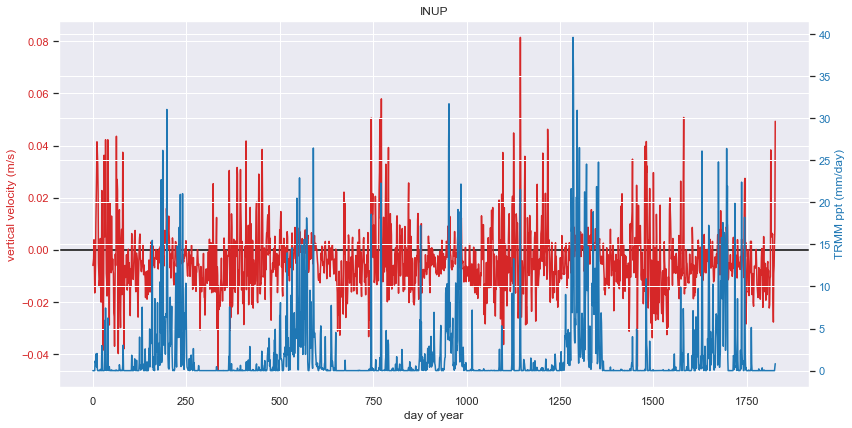

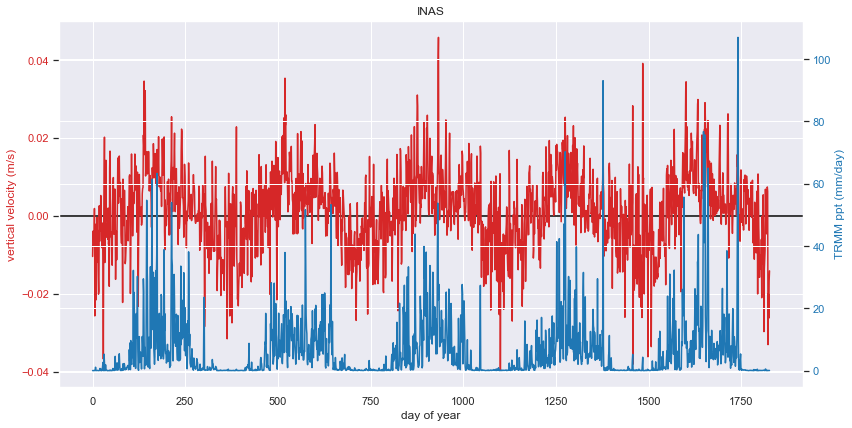

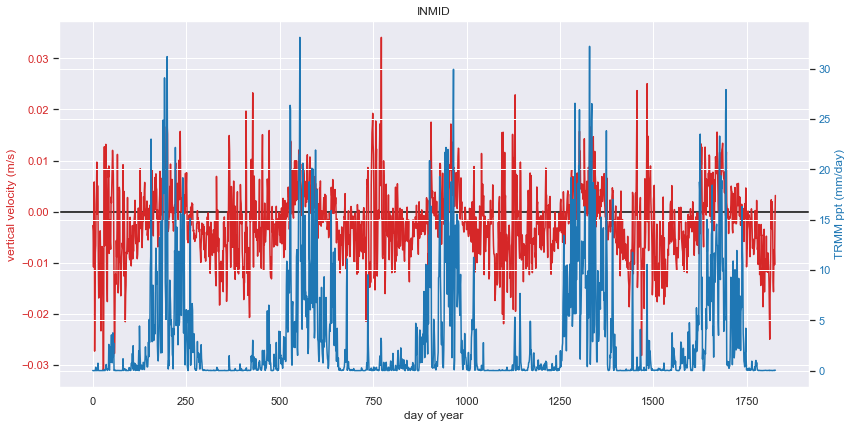

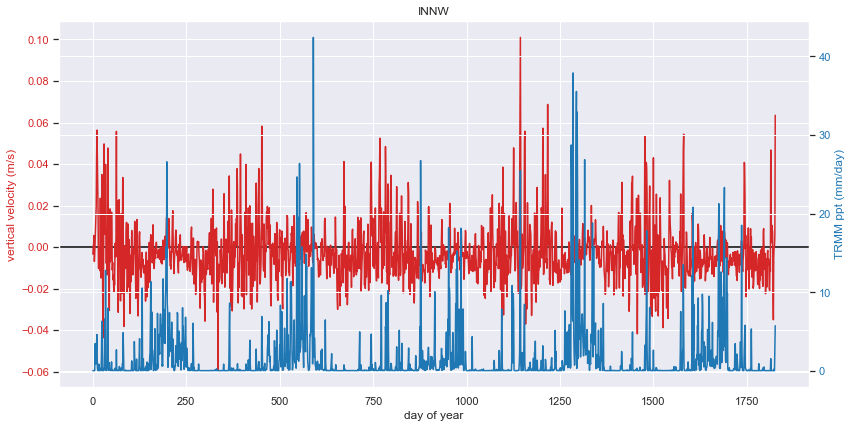

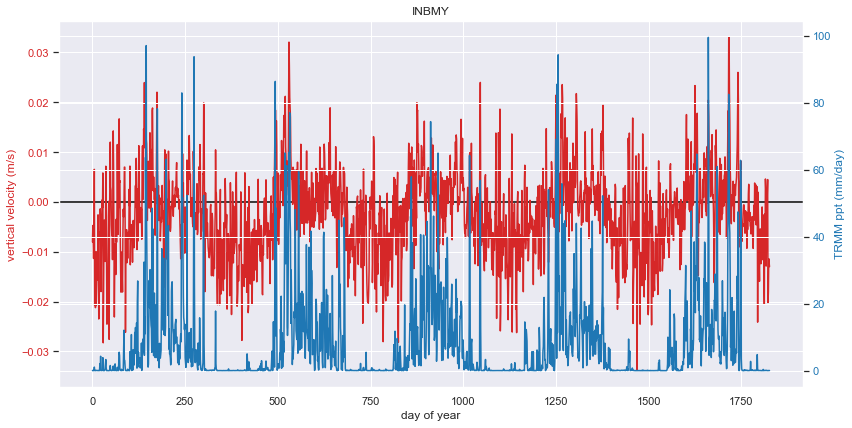

In [20]:
for region in regions:
    file_path = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/_obs/' + region + '/omega_RA_box/'
    file = file_path + 'omega_2000-2004.dat'
    omega_arr = np.loadtxt(fname = file)
        
    file_path_TRMM = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/_obs/' + region + '/ppt_TRMM_box/'
    file_TRMM = file_path_TRMM + 'PPT_2000-2004.dat'
    ppt_arr = np.loadtxt(fname = file_TRMM)
    
    v_arr = -omega_arr/(rho(3e3)*g)

    
    fig, ax1 = plt.subplots(figsize = (12,6))

    color = 'tab:red'
    ax1.set_xlabel('day of year')
    ax1.set_ylabel('vertical velocity (m/s)', color=color)
    ax1.axhline(0, color='black')
    ax1.plot(v_arr, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('TRMM ppt (mm/day)', color=color)  # we already handled the x-label with ax1
    ax2.plot(ppt_arr, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(region)


    
    plotfile = file_path + region + '_plot_omega.pdf'
    plt.savefig(plotfile)
    plt.show()


## copy input files from _obs to _inputs

In [6]:
import os

start_year = 2000
stop_year = 2004

for region in regions:
    read_path = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/_obs/' + region + '/omega_RA_box/'
    out_path = '/Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_inputs/' + region

    for year in range(start_year, stop_year+1):
        cmd_copy_files = 'cp ' + read_path + 'omega_2000-2004.dat ' + out_path + '/input_v_mid.dat'
    
    print (cmd_copy_files)
    os.system(cmd_copy_files)

print ('done')

cp /Users/raj/Documents/research/monsoons/monsoon_model_2020/model/_obs/INUP/omega_RA_box/omega_2000-2004.dat /Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_inputs/INUP/input_v_mid.dat
cp /Users/raj/Documents/research/monsoons/monsoon_model_2020/model/_obs/INAS/omega_RA_box/omega_2000-2004.dat /Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_inputs/INAS/input_v_mid.dat
cp /Users/raj/Documents/research/monsoons/monsoon_model_2020/model/_obs/INMID/omega_RA_box/omega_2000-2004.dat /Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_inputs/INMID/input_v_mid.dat
cp /Users/raj/Documents/research/monsoons/monsoon_model_2020/model/_obs/INNW/omega_RA_box/omega_2000-2004.dat /Users/raj/Documents/research/monsoons/monsoon_model_2020/model/organized/_inputs/INNW/input_v_mid.dat
cp /Users/raj/Documents/research/monsoons/monsoon_model_2020/model/_obs/INBMY/omega_RA_box/omega_2000-2004.dat /Users/raj/Documents/research/monso